**Multi-class Classification**

Neural Networks are often used to classify data. Examples:

1. take in photos and classify subjects in the photos as {dog,cat,horse,other}
2. take in a sentence and classify the 'parts of speech' of its elements: {noun, verb, adjective etc..}

A network of this type will have multiple units in its final layer. Each output is associated with a category. When an input example is applied to the network, the output with the highest value is the category predicted. If the output is applied to a softmax function, the output of the softmax will provide probabilities of the input being in each category.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.datasets import make_blobs



In [5]:

centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
x_train,y_train = make_blobs(n_samples =100, centers=centers, cluster_std=0.1, random_state=30)

In [9]:
print(x_train[:5])
print(y_train[:5])
print(np.unique(y_train))

[[ 4.93334827 -1.99945738]
 [ 4.90962171 -2.03120023]
 [ 4.950332   -2.01903658]
 [-5.03978674  2.10191274]
 [ 4.92150203 -1.80309747]]
[3 3 3 0 3]
[0 1 2 3]


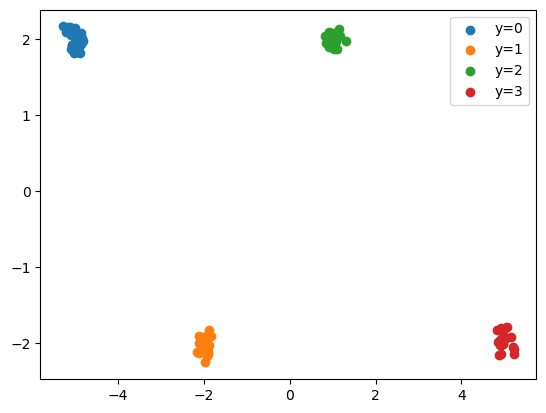

In [13]:
plt.figure()
plt.scatter(x_train[y_train==0,0],x_train[y_train==0,1], label = 'y=0')
plt.scatter(x_train[y_train==1,0],x_train[y_train==1,1], label = 'y=1')
plt.scatter(x_train[y_train==2,0],x_train[y_train==2,1], label = 'y=2')
plt.scatter(x_train[y_train==3,0],x_train[y_train==3,1], label = 'y=3')
plt.legend()

In [15]:
tf.random.set_seed(1234)
model = Sequential([
    Dense(2,activation='relu',name='L1'),
    Dense(4,activation='linear',name='L2')
])

model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.01)
)

model.fit(x_train,y_train,epochs=200)

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.7987  
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6473 
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5332 
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4418 
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.3673 
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.3058 
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2545 
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2114 
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1747 
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1426 
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.1139 
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0876 
Epoch 13/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0628 
Epoch 14/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0390 
Epoch 15/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0159 
Epoch 16/200
4/4 ━

In [17]:
pred = model.predict(x_train)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [18]:
print(y_train[:10],pred[:10])

[3 3 3 0 3 3 3 3 2 0] [[ -4.4626107  -4.87355    -4.4563375   3.2528856]
 [ -4.403386   -4.694228   -4.566016    3.236873 ]
 [ -4.468555   -4.8376765  -4.5082397   3.2728522]
 [  1.4572687   1.8218037  -2.3063474  -2.1745145]
 [ -4.6158953  -5.607917   -3.856874    3.2022288]
 [ -4.2465963  -4.1109905  -4.9830894   3.2314603]
 [ -4.780162   -5.252277   -4.5488024   3.537347 ]
 [ -4.6606026  -5.359205   -4.222602    3.3452094]
 [ -2.7195606 -11.059854    5.7031665  -1.125292 ]
 [  1.4572687   1.8218037  -2.3063474  -2.1745145]]


In [19]:
# convert logits to probabilities using softmax
pred_probs = tf.nn.softmax(pred, axis=1).numpy()

# quick checks
print(pred_probs[:5])
print("row sums (should be 1):", np.sum(pred_probs, axis=1)[:5])

# predicted class indices from probabilities
pred_classes = np.argmax(pred_probs, axis=1)
print("predicted classes:", pred_classes[:10])

[[4.4533421e-04 2.9526869e-04 4.4813668e-04 9.9881124e-01]
 [4.8010453e-04 3.5894237e-04 4.0804347e-04 9.9875283e-01]
 [4.3395959e-04 3.0001419e-04 4.1707541e-04 9.9884892e-01]
 [4.0168500e-01 5.7836384e-01 9.3189711e-03 1.0632174e-02]
 [4.0180885e-04 1.4900128e-04 8.5833739e-04 9.9859077e-01]]
row sums (should be 1): [1.         0.99999994 0.99999994 0.99999994 0.99999994]
predicted classes: [3 3 3 1 3 3 3 3 2 1]
